In [1]:
import pandas as pd

df_path = "/home/ngaggion/DATA/Raices/Bamboo_3/Report/all_data.csv"
df = pd.read_csv(df_path, sep=",")

df.head()

,Date,MainRootLength (mm),LateralRootsLength (mm),TotalLength (mm),NumberOfLateralRoots,ElapsedTime (h),NewDay,MainRootLengthGrad (mm/h),LateralRootsLengthGrad (mm/h),TotalLengthGrad (mm/h),MainOverTotal (%),LateralDensity (mm/mm),DiscreteLateralDensity (LR/cm),Plant_id,Experiment
0,2022-10-15 00:00:00,0.0,0.0,0.0,0.0,0.0,True,0.0,0.0,0.0,100.0,0.0,0.0,rpi9_cam_1_plant_2,Bamboo
1,2022-10-15 01:00:00,0.0,0.0,0.0,0.0,1.0,False,0.0,0.0,0.0,100.0,0.0,0.0,rpi9_cam_1_plant_2,Bamboo
2,2022-10-15 02:00:00,0.0,0.0,0.0,0.0,2.0,False,0.0,0.0,0.0,100.0,0.0,0.0,rpi9_cam_1_plant_2,Bamboo
3,2022-10-15 03:00:00,0.0,0.0,0.0,0.0,3.0,False,0.0,0.0,0.0,100.0,0.0,0.0,rpi9_cam_1_plant_2,Bamboo
4,2022-10-15 04:00:00,0.0,0.0,0.0,0.0,4.0,False,0.0,0.0,0.0,100.0,0.0,0.0,rpi9_cam_1_plant_2,Bamboo


In [23]:
dates = df['Date'].unique()
# get unique days
dates = [date.split(" ")[0] for date in dates]
dates = list(set(dates))
dates = sorted(dates)
dates = [date + " 23:00:00" for date in dates]

print(dates)
dates = dates[5:]

# get rows for each day
df_day = df[df['Date'].isin(dates)]

['2022-10-15 23:00:00', '2022-10-16 23:00:00', '2022-10-17 23:00:00', '2022-10-18 23:00:00', '2022-10-19 23:00:00', '2022-10-20 23:00:00', '2022-10-21 23:00:00', '2022-10-22 23:00:00', '2022-10-23 23:00:00', '2022-10-24 23:00:00']


In [24]:
dates

['2022-10-20 23:00:00',
 '2022-10-21 23:00:00',
 '2022-10-22 23:00:00',
 '2022-10-23 23:00:00',
 '2022-10-24 23:00:00']

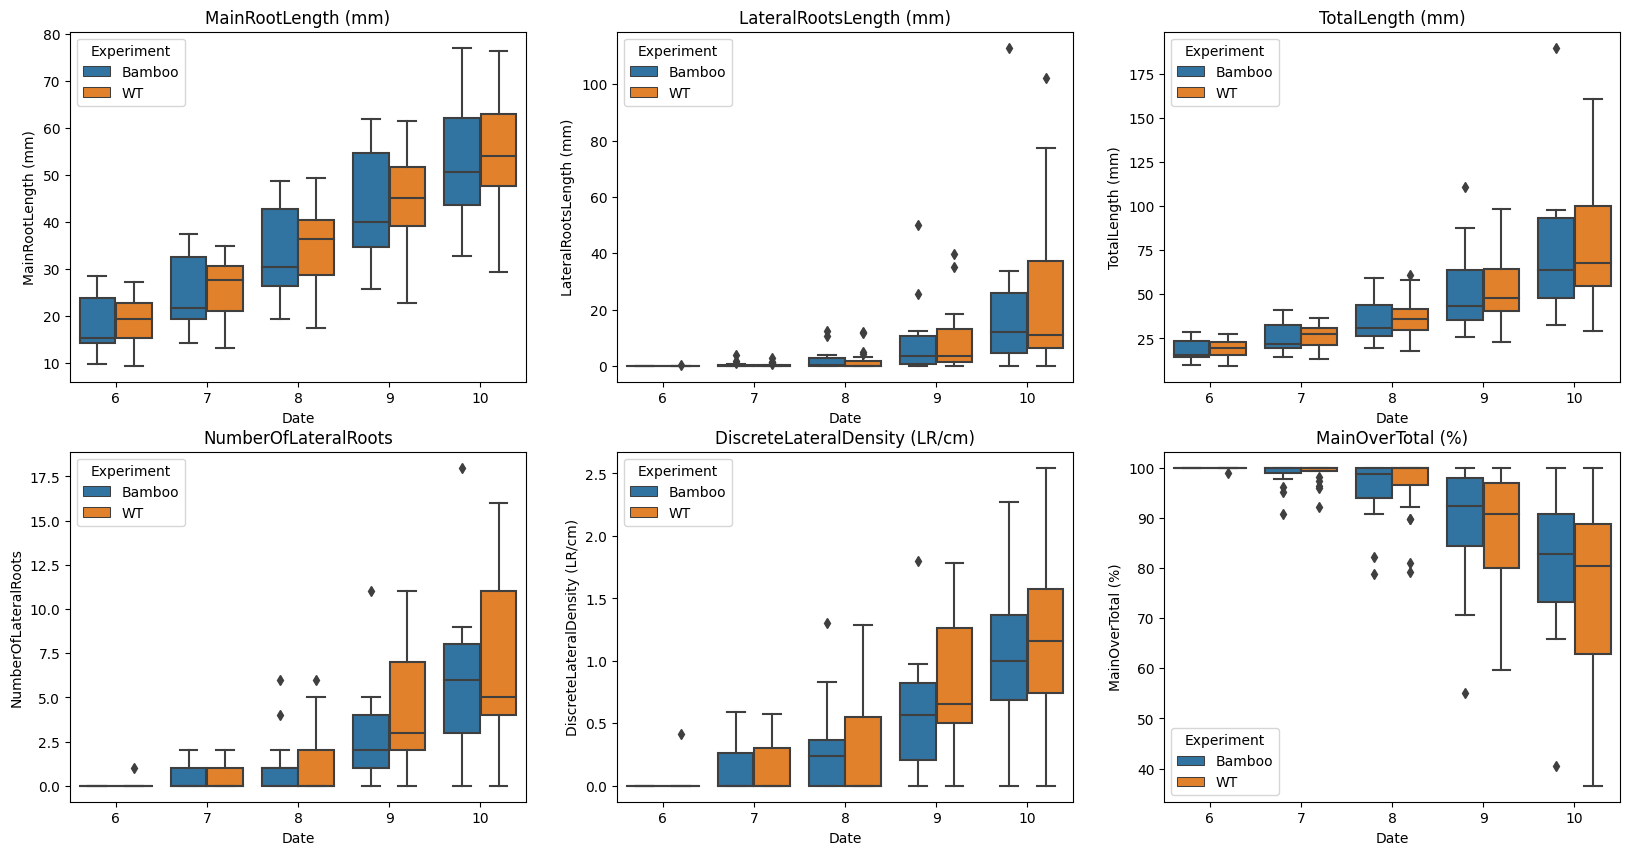

In [25]:
metrics = ['MainRootLength (mm)', 'LateralRootsLength (mm)', 'TotalLength (mm)', 
           'NumberOfLateralRoots', 'DiscreteLateralDensity (LR/cm)', 'MainOverTotal (%)']

import seaborn as sns
import matplotlib.pyplot as plt

# Draw boxplots for each metric hue = Experiment, y = metric, x = day

plt.figure(figsize=(20, 10))
i = 1
for metric in metrics:
    ax = plt.subplot(2, 3, i)
    sns.boxplot(x="Date", y=metric, hue="Experiment", data=df_day, ax=ax)
    # replace the actual date with the day number
    xticklabels = [6,7,8,9,10]
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel("Day")
    ax.set_title(metric)   

    i += 1

In [29]:
from scipy.stats import mannwhitneyu

# For each metric at each day, perform a Mann-Whitney U test between the two experiments
for metric in metrics:
    day = 6
    for date in dates:
        df_date = df_day[df_day['Date'] == date]
        df_date_exp1 = df_date[df_date['Experiment'] == "Bamboo"]
        df_date_exp2 = df_date[df_date['Experiment'] == "WT"]
        u, p = mannwhitneyu(df_date_exp1[metric], df_date_exp2[metric])
        
        print('Dia', day)
        print(metric, 'p-value:', p)
        if p < 0.05:
            print("Significativo")

        day += 1
    
    print("")

Dia 6
MainRootLength (mm) p-value: 0.7690800251454384
Dia 7
MainRootLength (mm) p-value: 0.7467434667490005
Dia 8
MainRootLength (mm) p-value: 0.7246176591547373
Dia 9
MainRootLength (mm) p-value: 0.6810653002117742
Dia 10
MainRootLength (mm) p-value: 0.5769815745341824

Dia 6
LateralRootsLength (mm) p-value: 0.397101145826251
Dia 7
LateralRootsLength (mm) p-value: 0.9124410724463733
Dia 8
LateralRootsLength (mm) p-value: 0.4018331678461512
Dia 9
LateralRootsLength (mm) p-value: 0.7238046920979593
Dia 10
LateralRootsLength (mm) p-value: 0.5371090770009175

Dia 6
TotalLength (mm) p-value: 0.7246176591547373
Dia 7
TotalLength (mm) p-value: 0.7467434667490005
Dia 8
TotalLength (mm) p-value: 0.7027194943179218
Dia 9
TotalLength (mm) p-value: 0.5769815745341824
Dia 10
TotalLength (mm) p-value: 0.4995293352868847

Dia 6
NumberOfLateralRoots p-value: 0.397101145826251
Dia 7
NumberOfLateralRoots p-value: 0.8680058684265486
Dia 8
NumberOfLateralRoots p-value: 0.696024437571857
Dia 9
NumberOfLat

In [31]:
import pandas as pd
from scipy.stats import mannwhitneyu

frame = pd.read_csv("/home/ngaggion/DATA/Raices/Bamboo_3/Report/ConvexHull/convex_hull.csv")
metrics =['Convex Hull Area','Aspect Ratio', "Lateral Density"]

for metric in metrics:

    if metric == "Latral Density":
        # remove rows with values higher than 10
        frame = frame[frame[metric] < 10]
        
    for day in range(6, 11):
        df_day = frame[frame['Day'] == day]

        df_day_exp1 = df_day[df_day['Experiment'] == "Bamboo"]
        df_day_exp2 = df_day[df_day['Experiment'] == "WT"]

        u, p = mannwhitneyu(df_day_exp1[metric], df_day_exp2[metric])
        print('Dia', day)
        print(metric, 'p-value:', p)
        if p < 0.05:
            print("Significativo")
    print("")


Dia 6
Convex Hull Area p-value: 0.4279748427078085
Dia 7
Convex Hull Area p-value: 0.814315238311959
Dia 8
Convex Hull Area p-value: 0.7690800251454384
Dia 9
Convex Hull Area p-value: 0.5769815745341824
Dia 10
Convex Hull Area p-value: 0.17686815901221276

Dia 6
Aspect Ratio p-value: 0.3474991758386614
Dia 7
Aspect Ratio p-value: 0.41106566656025056
Dia 8
Aspect Ratio p-value: 0.9298182244683655
Dia 9
Aspect Ratio p-value: 0.6596708049014466
Dia 10
Aspect Ratio p-value: 0.39455964190135573

Dia 6
Lateral Density p-value: 0.397101145826251
Dia 7
Lateral Density p-value: 0.9707614097044417
Dia 8
Lateral Density p-value: 0.6915919408602046
Dia 9
Lateral Density p-value: 0.65905851992059
Dia 10
Lateral Density p-value: 0.814115446343872

